**TARGET**: Predicth the amount of mpg given the horsepower value of a car

**Package Import**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Import of own module**

In [47]:
import importlib.util
spec = importlib.util.spec_from_file_location("module.name", r"C:\Users\BrechtDewilde\Documents\Python Scripts\Data Science Module\bd_ds_module.py")
mod = importlib.util.module_from_spec(spec)
spec.loader.exec_module(mod)

In [25]:
dir(mod)

['LinearRegression',
 'PolynomialFeatures',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'mean_absolute_error',
 'mean_squared_error',
 'pd',
 'plt',
 'poly_optimal_degree_determiner',
 'r2_score',
 'train_test_split']

**Data at the data**

In [2]:
cars = pd.read_csv(r"C:\Users\BrechtDewilde\Documents\UGENT -  statistical data analysis\STATISTICAL DATA ANALYSIS\SEM 2\Big data science\datasets\auto-clean.psv", sep = "|")
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


**Relationship between horsepower and mpg**

As the scatters are not randomly scatter accross the grid we can conlcude that there is a relationship between horsepower and mpg. However, a linear regression model will not fit this data sufficiently. 

In [4]:
mpg = cars["mpg"]
hp = cars["horsepower"]

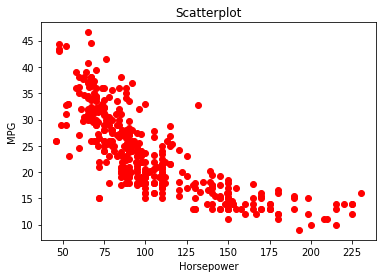

In [5]:
fig, ax = plt.subplots()
ax.plot(hp, mpg, linestyle = "None", color = "red", marker = "o")
ax.set_title("Scatterplot")
ax.set_xlabel("Horsepower")
ax.set_ylabel("MPG")
plt.show()

**Data splitting**

* training: 60%
* validation: 20%
* test: 20%

In [6]:
x_train, x_test, y_train, y_test = train_test_split(hp, mpg, train_size = 0.6 , random_state = 0)
x_validation, x_test, y_validation, y_test = train_test_split(x_test, y_test, train_size = 0.5, random_state = 0)

In [7]:
# test whether this approach is correct
total = x_train.describe()[0] + x_validation.describe()[0] + x_test.describe()[0]
print("Train : {} ; validation : {}; test : {}".format(round(x_train.describe()[0]/total, 2), round(x_validation.describe()[0]/total,2), round(x_test.describe()[0]/total,2)))

Train : 0.6 ; validation : 0.2; test : 0.2


**Polynomial regression**

In [8]:
# Reshape the data, necessary for the polynomial function
x_train = x_train.values.reshape(-1,1)
x_validation = x_validation.values.reshape(-1, 1)

In [9]:
# Preprocess the feature to a polynomial feature
degree = 2
poly = PolynomialFeatures(degree)
x_train_poly = poly.fit_transform(x_train)
x_validation_poly = poly.fit_transform(x_validation)

In [12]:
# Create the Linear regression on the polynomial feature
lr = LinearRegression(normalize = True)

# Fit the model
lr.fit(x_train_poly, y_train)

# Make predictions 
y_pred = lr.predict(x_validation_poly)

In [16]:
# Regression metrics
mae = mean_absolute_error(y_validation, y_pred)
mse = mean_squared_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)
print("MAE: {}, MSE: {}, r2: {}".format(round(mae,2), round(mse,2), round(r2,2)))

MAE: 3.29, MSE: 20.09, r2: 0.67


**Determine optimale polynomial degree**

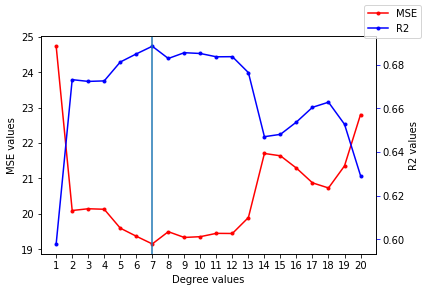

The optimal degree is: 7
With a respective mse of: 19.15
And with a r2 of: 0.69


In [48]:
cars = pd.read_csv(r"C:\Users\BrechtDewilde\Documents\UGENT -  statistical data analysis\STATISTICAL DATA ANALYSIS\SEM 2\Big data science\datasets\auto-clean.psv", sep = "|")
mod.poly_optimal_degree_determiner(cars["horsepower"], cars["mpg"], max_degree = 20)

**Compare linear regression test MSE with polynomial test MSE**

_simple linear regression_

In [122]:
#Split data in 80/20
hp = cars["horsepower"].values.reshape(-1,1)
mpg = cars["mpg"].values.reshape(-1,1)
x_train, x_test_simple, y_train, y_test = train_test_split(hp, mpg, random_state=0, test_size = 0.2)

# create and fit model
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

# prediction performance
y_pred = lr.predict(x_test_simple)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [123]:
x_train, x_test, y_train, y_test = train_test_split(hp, mpg, random_state=0, test_size = 0.2)

# make polynomials
poly = PolynomialFeatures(7)
x_train = poly.fit_transform(x_train) 
x_test_poly = poly.fit_transform(x_test)

# create and fit model
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

# prediction performance
y_pred_poly = lr.predict(x_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

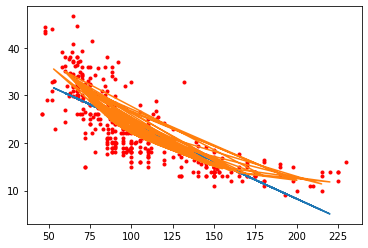

The simple linear regression has a MSE: 22.03 and R2:0.65
The simple linear regression has a MSE: 15.36 and R2:0.75


In [124]:
fig, ax = plt.subplots()
ax.plot(hp, mpg, marker = ".", color = "red", linestyle = "None")
ax.plot(x_test_simple, y_pred, label = "Simple")
ax.plot(x_test, y_pred_poly, label = "Poly")
plt.show()
print("The simple linear regression has a MSE: {} and R2:{}".format(round(mse, 2), round(r2, 2)))
print("The simple linear regression has a MSE: {} and R2:{}".format(round(mse_poly, 2), round(r2_poly, 2)))